# Projeto de Análise de Gorjetas 

#### Este projeto tem o objetivo de analisar se as gorjetas recebidas por um garçom são influenciadas por outras variáveis presentes no Dataset. Faremos um tratamento de dados, seguido de uma análise exploratória de dados (EDA) completa e tentaremos tirar conclusões acerca do nosso objetivo principal. 

# Tratamento de dados

### Importando a base de dados

In [1]:
import pandas as pd # Importando a biblioteca Pandas

In [2]:
dataset = pd.read_csv('data/tips_atualizado.csv') # Ler um arquivo csv

In [3]:
dataset.sample(5) # Mostra 5 linhas aleatórias do Dataset

,total_bill,tip,dessert,day,time,size
1706,18.742758,1.836963,No,Sat,Dinner,2
1674,29.088984,1.777583,Yes,Sat,Dinner,3
224,13.420000,1.580000,Yes,Fri,Lunch,2
1664,17.797207,3.814653,Yes,Thur,Lunch,3
396,18.838476,2.954311,No,Sun,Dinner,3


### Renomeando as colunas do Dataset

In [4]:
dataset.rename(columns = {'total_bill': 'valor_da_conta', 'tip': 'gorjeta', 'dessert': 'sobremesa',
                          'day':'dia_da_semana', 'time': 'horario_do_dia', 'size': 'quantidade_de_pessoas'}, inplace = True)

In [5]:
dataset.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,quantidade_de_pessoas
110,14.000000,3.000000,No,Sat,Dinner,2
2902,7.636015,1.539871,Yes,Sat,Dinner,2
52,34.810000,5.200000,No,Sun,Dinner,4
69,15.010000,2.090000,Yes,Sat,Dinner,2
2892,26.386474,1.880683,Yes,Sat,Dinner,2


### Renomeando os elementos do Dataset para português

In [6]:
dataset.sobremesa.unique() # Para vizualizar todos os elementos apenas uma única vez (Removendo duplicatas)

array(['No', 'Yes'], dtype=object)

In [7]:
dataset.sobremesa = dataset.sobremesa.map({'Yes': 'Sim', 'No': 'Não'}) # A função map irá substituir o que encontrar por um novo valor

In [8]:
dataset.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,quantidade_de_pessoas
2959,20.070402,2.029306,Não,Sat,Dinner,4
1392,7.363149,5.101593,Sim,Sun,Dinner,2
2942,15.876361,2.929500,Não,Sun,Dinner,2
1932,13.738072,1.628479,Sim,Fri,Lunch,2
525,17.365264,2.922233,Não,Sat,Dinner,3


In [9]:
dataset.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
dataset.dia_da_semana = dataset.dia_da_semana.map({'Sun': 'Domingo', 'Sat': 'Sabado', 'Thur': 'Quinta', 'Fri': 'Sexta'})

In [11]:
dataset.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,quantidade_de_pessoas
2361,24.950793,3.210653,Não,Domingo,Dinner,3
535,31.355681,4.460091,Não,Domingo,Dinner,4
3185,19.848900,3.089412,Não,Domingo,Dinner,4
1979,13.573594,1.938985,Não,Sabado,Dinner,2
2972,33.353835,4.140294,Não,Domingo,Dinner,4


In [12]:
dataset.horario_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [13]:
dataset.horario_do_dia = dataset.horario_do_dia.map({'Lunch': 'Almoco', 'Dinner': 'Jantar'})

In [14]:
dataset.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,quantidade_de_pessoas
2444,24.612304,2.773268,Não,Domingo,Jantar,4
1497,22.586440,2.216329,Não,Sabado,Jantar,4
1956,23.421333,2.826849,Não,Domingo,Jantar,4
164,17.510000,3.000000,Sim,Domingo,Jantar,2
2591,12.518080,2.081097,Não,Domingo,Jantar,2


### Arredondar os Valores da Conta e as Gorjetas para duas casas decimais

In [15]:
dataset.valor_da_conta = dataset.valor_da_conta.round(2)

In [16]:
dataset.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,quantidade_de_pessoas
1975,35.56,6.018291,Não,Sabado,Jantar,4
1978,14.28,1.889822,Não,Sabado,Jantar,2
123,15.95,2.000000,Não,Quinta,Almoco,2
463,31.80,2.224633,Sim,Sabado,Jantar,4
2879,7.89,1.502814,Não,Quinta,Almoco,2


In [17]:
dataset.gorjeta = dataset.gorjeta.round(2)

In [18]:
dataset.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,quantidade_de_pessoas
196,10.34,2.00,Sim,Quinta,Almoco,2
1392,7.36,5.10,Sim,Domingo,Jantar,2
39,31.27,5.00,Não,Sabado,Jantar,3
2252,34.53,2.21,Sim,Sabado,Jantar,4
2038,13.64,1.90,Não,Quinta,Almoco,2


### Verificando se existe valores nulos no Dataset

In [19]:
dataset.shape[0] # Vendo a quantidade de registros no Dataset

3416

In [20]:
dataset.info() # Ver as informações sobre o dataset (Nesse caso não há valores nulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   valor_da_conta         3416 non-null   float64
 1   gorjeta                3416 non-null   float64
 2   sobremesa              3416 non-null   object 
 3   dia_da_semana          3416 non-null   object 
 4   horario_do_dia         3416 non-null   object 
 5   quantidade_de_pessoas  3416 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 160.2+ KB


#### Depois de tratar nossos dados, acredito que agora temos uma maneira mais clara para manipular esses dados e tirar conclusões.

# Análise Exploratória de Dados

## Análise I - Valor da conta X Gorjetas

In [21]:
import seaborn as sns # Importando a biblioteca Seaborn do python
import matplotlib.pyplot as plt # Importando a biblioteca Matplotlib do python

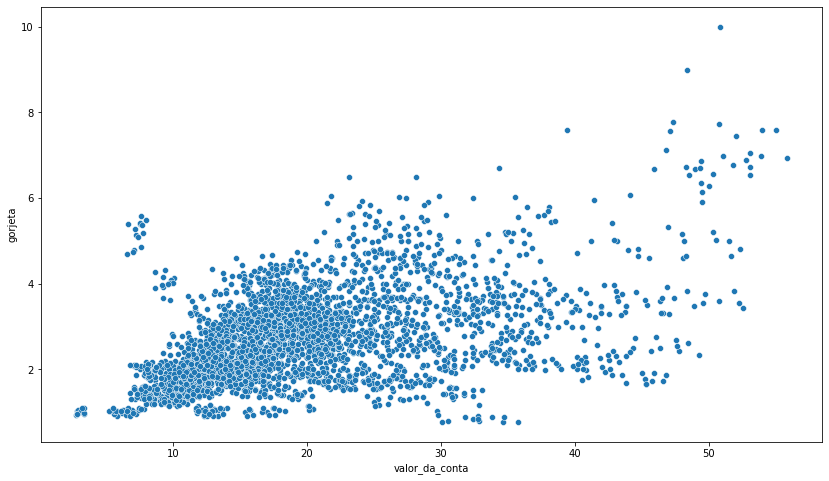

In [22]:
plt.figure(figsize=(14,8)) # Aumentar tamanho do grafico
valor_x_gorjetas = sns.scatterplot(x='valor_da_conta', y='gorjeta',data=dataset) # Plotar Grafico de dispersao

#### O valor da conta parece ser proporcional ao valor da gorjeta, vamos criar uma nova coluna no nosso Dataset contendo a porcentagem, para nos ajudar em análises futuras

In [23]:
dataset['porcentagem'] = (dataset.gorjeta/dataset.valor_da_conta).round(2)

In [24]:
dataset.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,quantidade_de_pessoas,porcentagem
255,38.15,3.83,Não,Domingo,Jantar,4,0.10
1899,19.41,4.54,Sim,Quinta,Almoco,2,0.23
2129,14.32,2.07,Sim,Domingo,Jantar,2,0.14
3115,30.58,1.57,Sim,Domingo,Jantar,5,0.05
1735,12.93,2.04,Não,Sabado,Jantar,2,0.16


## Análise II - Gorjetas X Sobremesa

### Vendo descrições estatística levando em conta a sobremesa

In [26]:
dataset[dataset.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,quantidade_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800084,2.710154,2.408602,0.153425
std,9.901309,1.162326,0.806690,0.088968
min,2.800000,0.770000,1.000000,0.020000
25%,13.495000,1.910000,2.000000,0.090000
50%,17.915000,2.435000,2.000000,0.150000
75%,26.805000,3.327500,3.000000,0.190000
max,55.800000,10.000000,5.000000,0.810000


In [27]:
dataset[dataset.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,quantidade_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223477,2.711949,2.668874,0.150043
std,8.316047,1.024189,1.014848,0.044218
min,6.530000,0.910000,1.000000,0.040000
25%,13.282500,1.930000,2.000000,0.120000
50%,17.735000,2.610000,2.000000,0.150000
75%,22.750000,3.287500,3.000000,0.180000
max,53.090000,9.000000,6.000000,0.340000


#### Aqui podemos levantar alguns pontos acerca das informações acima:

> A média e o desvio padrão do valor da conta de quem pediu ou não sobremesa é muito semelhante.

> A média do valor da gorjeta de quem pediu ou não sobremesa é muito semelhante também.

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


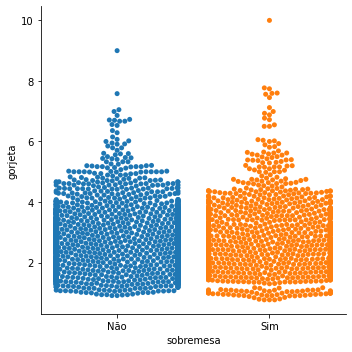

In [28]:
sns.catplot(x='sobremesa', y = 'gorjeta', kind = 'swarm', data=dataset) # Plotando gráfico categórico

#### Nesse ponto tivemos uma Warn, onde tentamos utilizar o método kind = swarm para separar os pontos que tem valores muito próximos para vizualizarmos melhor, porém a quantidade de dados é muito grande e o notebook nos retorna uma Warn dizendo que alguns desses pontos não foram colocados no gráfico, inviabilizando essa análise

>Porém podemos tirar uma conclusão superficial que a sobremesa parece não ter influência em cima do valor da gorjeta

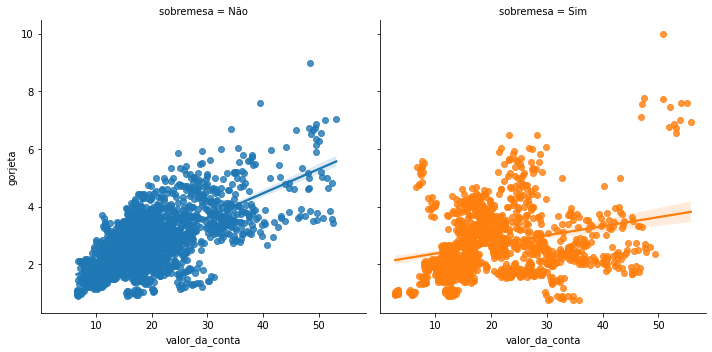

In [29]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',col='sobremesa',data=dataset) # Plotar gráfico de dispersão, com uma reta parametrizada

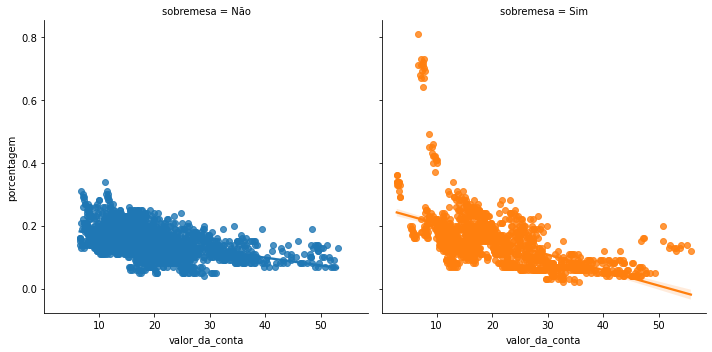

In [30]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa',col='sobremesa',data=dataset)

#### Pelas inclinações das retas parece existir uma diferença no valor da gorjeta para as pessoas que pediram ou não sobremesa
>Para confirmar isso, iremos fazer um teste de hipótese

### Teste de hipótese
**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta são iguais nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não são iguais nos dois grupos**

In [31]:
from scipy.stats import ranksums # Importando o modulo ranksums da biblioteca scipy.stats

In [93]:
com_sobremesa = dataset.query("sobremesa == 'Sim'").porcentagem

In [94]:
sem_sobremesa = dataset.query("sobremesa == 'Não'").porcentagem

In [95]:
r = ranksums(sem_sobremesa, com_sobremesa)

In [96]:
print('O p-value é igual a: {}'.format(r.pvalue))

O p-value é igual a: 0.032388249176029886


#### O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.
>Como nosso p-value < 0,05, Aceitamos a hipótese alternativa

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não são iguais nos dois grupos**

In [90]:
dataset.groupby(['sobremesa']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
sobremesa,,,
Não,19.223477,2.711949,0.150043
Sim,20.800084,2.710154,0.153425


## Análise III - Gorjetas X Dia da Semana

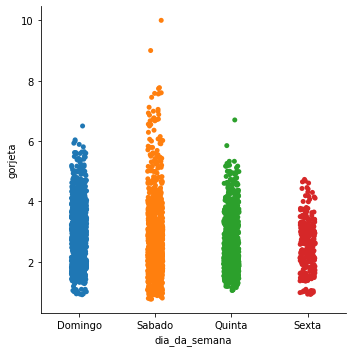

In [39]:
sns.catplot(x='dia_da_semana', y = 'gorjeta', data = dataset)

#### Parece haver uma maior dispersão no sabado, onde as gorjetas tendem a ser um pouco mais altas que o padrão

In [45]:
count_dia_da_semana = dataset.dia_da_semana.value_counts()
print('Quantidade de gorjetas por dias da semana:\n{}'.format(count_dia_da_semana))

Quantidade de gorjetas por dias da semana:
Sabado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64


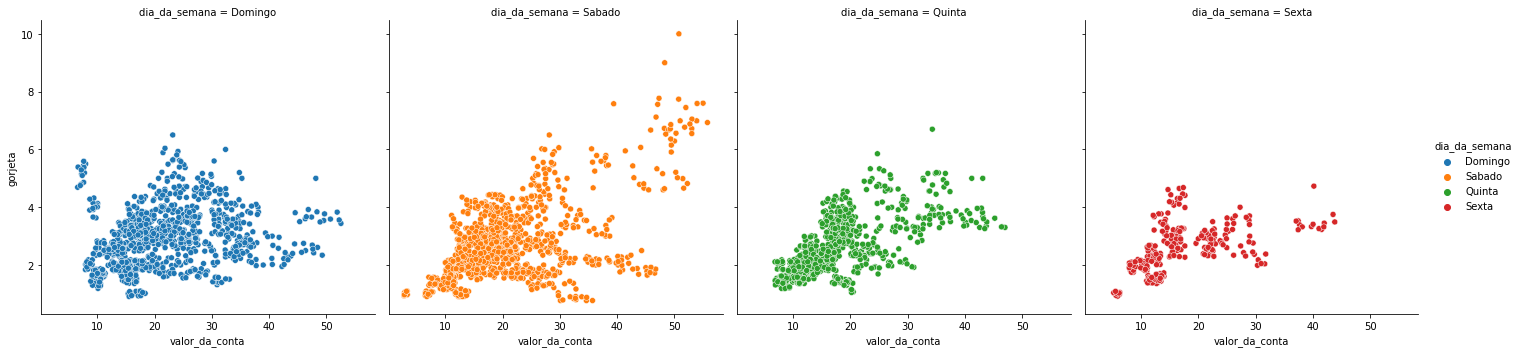

In [47]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='dia_da_semana',col='dia_da_semana',data=dataset)

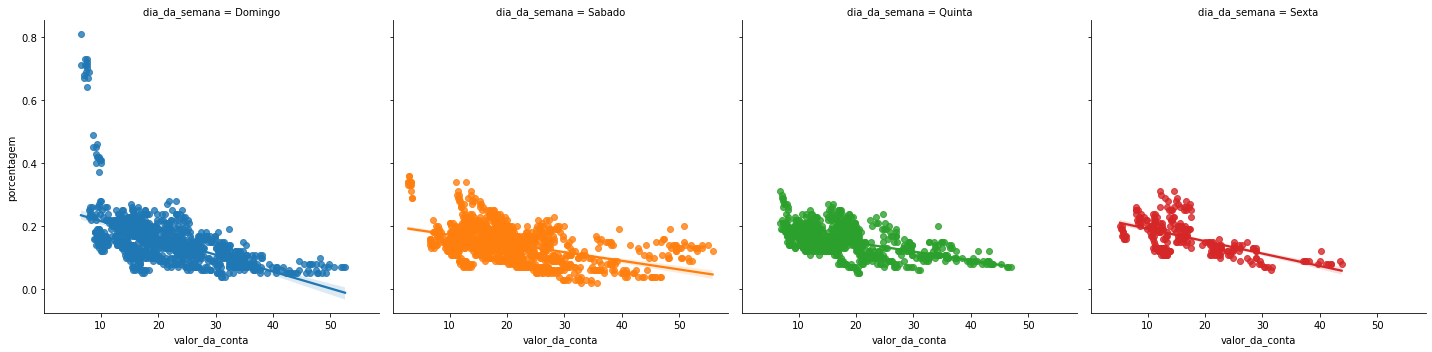

In [48]:
sns.lmplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=dataset)

### Comparando a média geral com a média dos dias

In [54]:
media_geral_gorjeta = dataset.gorjeta.mean()
print('A média geral dos valores das gorjetas é: {}'.format(media_geral_gorjeta))

A média geral dos valores das gorjetas é: 2.7112646370023388


In [56]:
dataset.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439267,2.902199,0.154962
Quinta,17.723929,2.556198,0.154055
Sabado,20.480337,2.690164,0.143612
Sexta,17.215564,2.550150,0.163271


#### Podemos notar que a média da gorjeta no domingo tende a ser maior do que nos outros dias

## Análise IV - Horário do Dia

In [61]:
dataset.horario_do_dia.unique()

array(['Jantar', 'Almoco'], dtype=object)

In [62]:
dataset.horario_do_dia.value_counts()

Jantar    2464
Almoco     952
Name: horario_do_dia, dtype: int64

<AxesSubplot:xlabel='horario_do_dia', ylabel='gorjeta'>

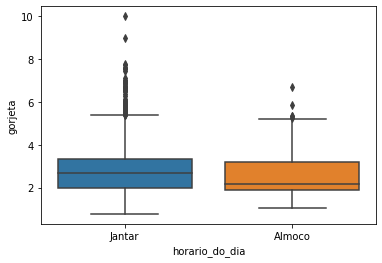

In [65]:
sns.boxplot(x='horario_do_dia', y='gorjeta',data=dataset)

#### Pelo boxplot, visualmente podemos ver que a mediana do almoço é menor do que os valores do jantar

In [88]:
dataset.groupby(['horario_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
horario_do_dia,,,
Almoco,17.213803,2.534548,0.157658
Jantar,20.833036,2.779541,0.148888


In [89]:
dataset.groupby(['horario_do_dia']).median()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
horario_do_dia,,,
Almoco,15.34,2.19,0.15
Jantar,18.89,2.68,0.14


#### Tanto a mediana quanto a média no Jantar são maiores do que no Almoço. Porém, o valor da conta parece estar casado com a gorjeta, porque a media e a mediana no Jantar também são maiores, confirmando o que concluimos na primeira etapa da análise

# Conclusões

>O **valor da gorjeta** tende a ser maior quando o **valor da conta** aumenta (diretamente proporcionais).

>Pelo teste de hipótese aceitamos a alternativa onde **A distribuição da taxa da gorjeta é diferente para quem pediu ou não sobremesa**.

>No **Domingo** as **taxas de gorjetas são mais altas** do que nos demais dias.

>No **Jantar** as pessoas parecem **gastar mais** e consequentemente a **gorjeta é maior**.

>Para um Garçom a melhor estratégia para captar mais recursos é **trabalhar no Jantar de Domingo**.

>Neste projeto não ficou claro como a **sobremesa afeta nas gorjetas**.